In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%load_ext lab_black
#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as units
import pickle

#
plt.style.use("mls_scf")

In [2]:
%autoreload 2
import dualpy as dp

In [3]:
t = np.linspace(0, 100, 101) << units.s

In [4]:
a = 5.0 * units.m
a = dp.seed(a, "a")
omega = 0.2 * units.rad / units.s
omega = dp.seed(omega, "omega")
t = dp.seed(t, "t")

In [5]:
x = a * np.sin(omega * t)

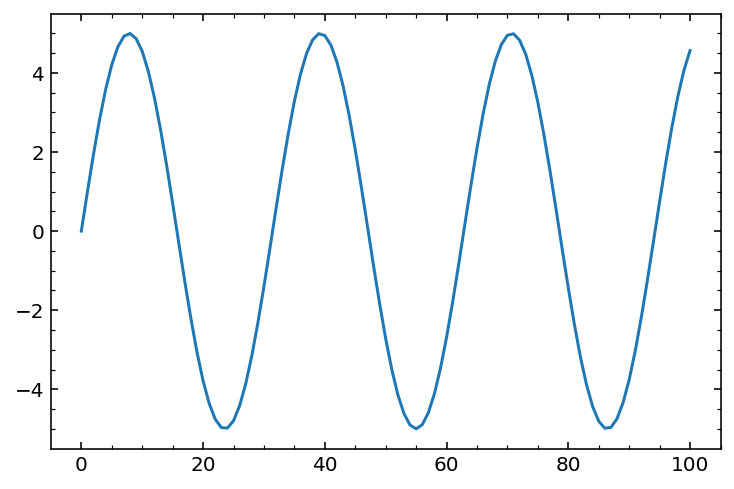

In [6]:
plt.plot(t, x)

In [7]:
print(x.jacobians)

{'a': Jacobian of type <class 'dualpy.sparse_jacobians.SparseJacobian'>
Dependent shape is (101,) <101>
Independent shape is () <1>
Combined they are (101,) <101>
Dummies are (1,) and ()
Units are d<m>/d<m> = <>
data2d is (101, 1) with 101 numbers stored (1e+02%), 'omega': Jacobian of type <class 'dualpy.sparse_jacobians.SparseJacobian'>
Dependent shape is (101,) <101>
Independent shape is () <1>
Combined they are (101,) <101>
Dummies are (1,) and ()
Units are d<m>/d<rad / s> = <m s / rad>
data2d is (101, 1) with 101 numbers stored (1e+02%), 't': Jacobian of type <class 'dualpy.diagonal_jacobians.DiagonalJacobian'>
Dependent shape is (101,) <101>
Independent shape is (101,) <101>
Combined they are (101, 101) <10201>
Dummies are (1,) and (1,)
Units are d<m>/d<s> = <m / s>
data is (101,)}


In [17]:
j = x.jacobians["t"]
j.shape

(101, 101)

In [18]:
print(j._dummy_dependent)

(1,)


In [29]:
a = np.arange(100).reshape([10, 1, 10, 1])
b = np.arange(10).reshape([1,10]).broadcast_to([10,10])

AttributeError: 'numpy.ndarray' object has no attribute 'broadcast_to'

In [28]:
print(a.shape, b.shape)

(10, 10) (1, 10)


In [26]:
c = a + b
print(c.shape)

(10, 10)


In [30]:
x = np.ones(10)
print(x)
print(np.cumsum(x))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
